**University of Science and Technology UST,  Zewail City**<br>
**CIE Program**<br>
**Natural Language Processing - CIE 555**<br>
**Lab Assignment #3 - POS Tagging**<br>

**Student Name:** Elsayed Mohammed Elsayed Mostafa <br>
**Student ID:**   201700316

# Imports 

In [5]:
import nltk
nltk.download('dependency_treebank')

[nltk_data] Downloading package dependency_treebank to
[nltk_data]     /home/elsayed/nltk_data...
[nltk_data]   Unzipping corpora/dependency_treebank.zip.


True

In [6]:
from __future__ import division
import sys
from pprint import pprint
from math import log
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np 
from numpy.random import random_sample
import nltk
from nltk import FreqDist, ConditionalFreqDist
from nltk.tag import *
from nltk.corpus import dependency_treebank
from nltk.tag.hmm import HiddenMarkovModelTagger

# Helper Functions

In [60]:
def plot_histogram(lcPairs):
    '''A very general function that takes either a dictionary
    or a list of label,count pairs (values or counts need to be
    numbers), and makes a bar plot showing the count for each label.
    '''
    plt.clf()
    if isinstance(lcPairs, dict):
        lcPairs = list(lcPairs.items())
    #arange() is like range() but returns a numpy array instead of a list
    x_pos = np.arange(len(lcPairs)) 
    #first arg (x_pos) is the position of left hand side of bar
    #second arg (counts) is the height of bar
    (labels,counts)=zip(*lcPairs)
    plt.bar(x_pos,counts,width=1)
    #bar width is 1, so put labels at left side + .5 (middle of bar), rotated slightly
    plt.xticks(x_pos+.5, labels, rotation=90)
    plt.ylim([0,1.1*max(counts)])
    plt.show()

In [61]:
def tag_distribution(sents):
    '''Takes tagged sentences extracted using nltk libraries
    as input and returns a frequency distribution of pos tags
    '''
    fd=defaultdict(int)
    for s in sents:
        for (w,t) in s:
            fd[t]+=1
    fd = sorted(fd.items(), key=lambda x: x[1], reverse = True)
    return fd

In [62]:
def word_tag_distribution(sents):
    ''' Takes tagged sentences extracted using nltk libraries
    as input and returns the conditional frequency distribution of word and pos tags
    '''
    # Instead of using defaultdict, do things a step at a time:
    cfd = {}
    # For each word,tag tuple in each sentence,
    #   create an fd if necessary, and update the tag count
    for sent in sents:
        for (w,t) in sent:
            fd = cfd.setdefault(w,{}) # either get the value,
                                    #  or give it an empty dictionary as value
            if t in fd:
                # a known key
                cfd[w][t] += 1 
            else:
                # not previously seen
                cfd[w][t] = 1 
    return cfd

In [63]:
def ut1(word,cfd,bpos):
    ''' Helper function for unigram_tagger.  Look up the most common tag for
        a single word in cfd, using bpos if it's not in there.
        Returns a pair (word, tag)'''
    if word in cfd:
        return sorted(cfd[word].items(), key=lambda x: x[1], reverse = True)[0][0]    
    else:
        return bpos 

In [64]:
def unigram_tagger(cfd, bpos, sent):
    ''' This is a simple pos tagger. It takes conditional frequency 
    distribution (cfd) of word and its tags, and sentence as input 
    and assigns pos tags to the words in that sentence. If a word is
    seen (present in cfd), it assigns the most frequent tag for that
    word. For unseen words (not present in cfd), it assigns a default
    pos tag (in this case common noun "NN").
    '''
    words = sent.rstrip().split()
    return [ut1(w,cfd,bpos) for w in words]

## POS Tagging Procedure

In [65]:
# Extracting tagged sentences using NLTK libraries from the tesents datastructure..
tsents = dependency_treebank.tagged_sents()
# Let's have a quick look on tsents
tsents

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

## Tags distribution

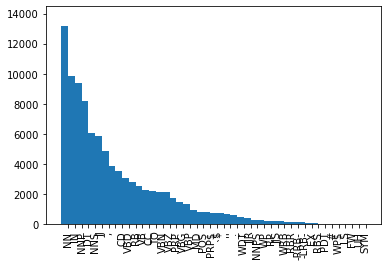

In [66]:
tags_dist = tag_distribution(tsents)
plot_histogram(tags_dist)

## Word tag distribution

In [67]:
word_tag_dist = word_tag_distribution(tsents)
#print(word_tag_dist)
print("tags for book are: {}".format(word_tag_dist["book"]))

tags for book are: {'NN': 7, 'VB': 1}


## Unigram Tagger

In [68]:
cfd=word_tag_dist
bpos= tags_dist[1][0]
sent='The quick brown fox jumped over the lazy dog'
tag_list=unigram_tagger(cfd, bpos, sent)
print("sentence is : {}".format(sent))
print("tags are: {}".format(tag_list))

sentence is : The quick brown fox jumped over the lazy dog
tags are: ['DT', 'JJ', 'IN', 'IN', 'VBD', 'IN', 'DT', 'IN', 'IN']
